In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import Tensor
import abc
from torch.distributions import MultivariateNormal, Poisson
from torch import optim
from torch.utils.data import DataLoader, Dataset
from torch.nn import Module
from torch import nn
from torch.optim.lr_scheduler import StepLR
from main import *
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

import pickle
from scipy.interpolate import CubicSpline
from sklearn.metrics import r2_score

In [18]:
# n = torch.nn.Sequential(
#     torch.nn.Linear(5, 10),
#     torch.nn.ReLU(),
#     torch.nn.Linear(10, 2)
# )

# print(n(torch.rand(5)).shape)
# print(n(torch.rand(2,3,5)).shape)
# print(n(torch.rand(4,4,2,3,5)).shape)

torch.Size([2])
torch.Size([2, 3, 2])
torch.Size([4, 4, 2, 3, 2])


In [2]:
# M = 100 * torch.eye(100) + 10 * torch.rand(100,100)
# M_half = torch.cholesky(M)
# M_inv = torch.inverse(M)
# M_half_inv = torch.inverse(M_half)
# x = torch.randn(1, 100)
# y = x @ M_inv
# y2 = rec_model.chol_inv(M_half, x, left=False)
# print(y - y2)



In [3]:
# v = torch.randn(4, 2, 10)
# Y = torch.randint(0, 10, (4, 5, 10)).float()
# # print(v, Y)
# lik = Poisson_noise()
# model = LDS(v, Y, lik, x_dim=12)
# rec_model = RecognitionModel(model)
# rec_model.get_x_tilde(Y).shape

In [2]:
torch.manual_seed(1)
np.random.seed(1)
v = torch.randn(4, 2, 10)
# Y = torch.randn(4, 5, 10)
Y = torch.randint(0, 10, (4, 50, 10)).float()
# print(v, Y)
lik = Poisson_noise()
model = LDS(v, Y, lik)
# model.joint_LL(3)
train_params = {'batch_size': None, 'step_size': 100, 'lrate': 5e-2, 'max_steps': 101}
model.train_supervised_model(model.training_params(**train_params))

step 0 LL -3619.640869140625
step 1 LL -3431.90478515625
step 2 LL -3321.677490234375
step 3 LL -3230.18408203125
step 4 LL -3160.1591796875
step 5 LL -3091.21337890625
step 6 LL -3035.5517578125
step 7 LL -2976.96630859375
step 8 LL -2935.47021484375
step 9 LL -2892.740234375
step 10 LL -2847.384521484375
step 11 LL -2818.67529296875
step 12 LL -2778.63525390625
step 13 LL -2747.543212890625
step 14 LL -2718.13720703125
step 15 LL -2675.989990234375
step 16 LL -2635.78125
step 17 LL -2596.9697265625
step 18 LL -2588.021240234375
step 19 LL -2534.326171875
step 20 LL -2470.41015625
step 21 LL -2459.570068359375
step 22 LL -2374.4814453125
step 23 LL -2380.52978515625
step 24 LL -2267.029296875
step 25 LL -2210.305419921875
step 26 LL -2131.841796875
step 27 LL -2083.55712890625
step 28 LL -1983.0291748046875
step 29 LL -1864.73974609375
step 30 LL -1864.655029296875
step 31 LL -1772.44384765625
step 32 LL -1678.72998046875
step 33 LL -1685.0843505859375
step 34 LL -1678.115966796875
st

In [4]:
model.freeze_params()
rec_model = RecognitionModel(model, rnn=True)
train_params = {'batch_size': None, 'step_size': 100, 'lrate': 5e-2, 'max_steps': 101, 'n_mc_x': 10, 'n_mc_z': 10}
rec_model.train_recognition_model(rec_model.training_params(**train_params))

step 0 LL -3.060935302734375
step 1 LL -2.90201806640625
step 2 LL -2.916760986328125
step 3 LL -2.888219482421875
step 4 LL -2.9010947265625
step 5 LL -2.9134677734375
step 6 LL -2.89589111328125
step 7 LL -2.90336376953125
step 8 LL -2.88761083984375
step 9 LL -2.880442626953125
step 10 LL -2.902146240234375
step 11 LL -2.92834228515625
step 12 LL -2.90989306640625
step 13 LL -2.9095927734375
step 14 LL -2.92846875
step 15 LL -2.913643798828125
step 16 LL -2.90685595703125
step 17 LL -2.89570654296875
step 18 LL -2.9234091796875
step 19 LL -2.8943466796875
step 20 LL -2.92077490234375
step 21 LL -2.902870849609375
step 22 LL -2.91409521484375
step 23 LL -2.90305810546875
step 24 LL -2.90931103515625
step 25 LL -2.90140966796875
step 26 LL -2.904244140625
step 27 LL -2.9139912109375
step 28 LL -2.907197998046875
step 29 LL -2.904814208984375
step 30 LL -2.90180712890625
step 31 LL -2.918916015625
step 32 LL -2.913892822265625
step 33 LL -2.89959375
step 34 LL -2.910072265625
step 35 L

[[ 0.2782208   0.20921635 -0.15783327 -0.11597944  0.50267757]
 [ 0.20921635  0.62540461 -0.07440552 -0.1590074  -0.34949867]
 [-0.15783327 -0.07440552  0.56790749 -0.23986521 -0.04603175]
 [-0.11597944 -0.1590074  -0.23986521  0.53484125  0.11551827]
 [ 0.50267757 -0.34949867 -0.04603175  0.11551827 -0.10637415]]
(5,) (5, 5)


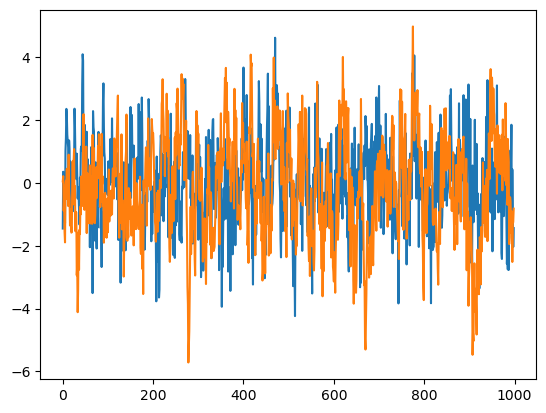

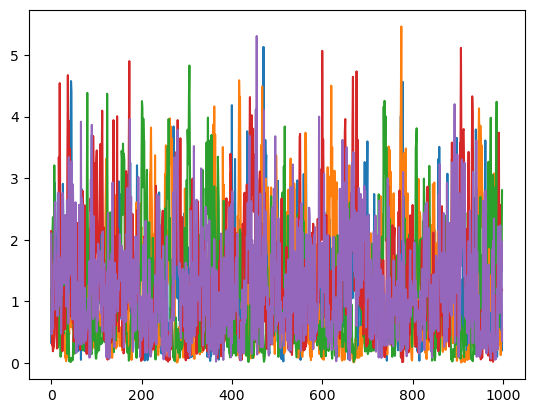

23.686747804218317


In [5]:
# Simulate some data
torch.manual_seed(0)
np.random.seed(0)
N = 100
x_dim = 5

# sqrt m  division in matrix C 

# A = np.array([[0.9, 0.4], [-0.2, 0.8]])
# s = np.array([0.8, 0.99]).reshape(1, -1)
# u, _ = np.linalg.qr(np.random.randn(s.shape[1], s.shape[1]))
# A = u @ np.diag(s.squeeze()) @ u.T
eigs = np.array([-0.6, 0.2, 0.6, 0.8, 0.9])
A = np.diag(eigs)
u, _ = np.linalg.qr(np.random.randn(x_dim, x_dim))
A = u @ A @ u.T
print(A)

# B = np.array([[0.1, 0.0], [0.0, 0.1]])
B = 1 * np.eye(x_dim)
W = np.eye(x_dim)
# W = np.array([[1, 0], [0, 1]])
# C = np.random.randn(N, x_dim)

# Have C to be multiple identity matrices
C = np.vstack([np.eye(x_dim)] * (N//x_dim)) # Could also use random weights with std sqrt(m)

sigma_x = 0.01

# mu0 = np.array([0., 0.])
# Sigma0 = np.array([[.010, 0.0], [0.0, .010]])
mu0 = np.zeros(x_dim)
Sigma0 = 1 * np.eye(x_dim)
print(mu0.shape, Sigma0.shape)

ntrials = 1
# v0 = np.random.multivariate_normal(mu0, Sigma0)
v0 = mu0 + (np.linalg.cholesky(Sigma0) @ np.random.randn(ntrials,x_dim, 1)).squeeze(-1)

T = 1000
v = np.zeros((ntrials,x_dim,T))
x = np.zeros((ntrials,x_dim,T))
x_noise_free = np.zeros((ntrials,x_dim,T))
v[:,:, 0] = v0
x_noise_free[:,:, 0] = (W @ v0[..., None]).squeeze(-1)
x[:,:, 0] = (W @ v0[..., None]).squeeze(-1) + sigma_x * np.random.randn(ntrials, x_dim,)
for t in range(1, T):
    v[..., t] = (A @ v[..., t-1][..., None]).squeeze(-1) + (B @ np.random.randn(ntrials, x_dim,1)).squeeze(-1)
    x_noise_free[..., t] = (W @ v[..., t][..., None]).squeeze(-1)
    x[..., t] = (W @ v[..., t][..., None]).squeeze(-1) + sigma_x * np.random.randn(ntrials, x_dim)

stop = -1
plt.plot(v[-1,0,:stop])
plt.plot(v[-1,1,:stop])
plt.show()

_d = 0.5
F = C[None, ...] @ x + _d
# plt.plot(F[0,0,:stop])
# plt.plot(F[0,1,:stop])

# link = np.exp
link = lambda x: 20 * np.log(1 + np.exp(x))
dt = 0.05
for i in range(5):
    plt.plot(link(F[0,i,:stop])*dt)
plt.show()

# Average firing rate
print(np.mean(link(F)))


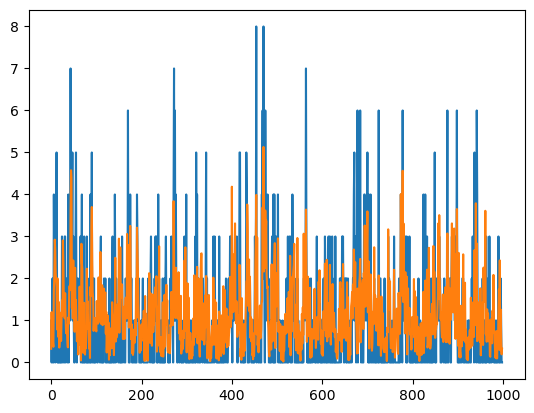

In [6]:
# link_fn = torch.exp
# link = lambda x: np.exp(x)
link_fn = lambda x: 20 * torch.nn.functional.softplus(x)
link = lambda x: 20 * np.log(1 + np.exp(x))
lik = Poisson_noise()
Y = np.random.poisson(link(F)*dt)

# sigma = 0.1
# Y = np.random.randn(*F.shape) * sigma + F
# lik = Gaussian_noise(sigma)
# link_fn = lambda x: x

# # Sigmoid link function
# link = lambda x: 1 / (1 + np.exp(-x))
# Y = np.random.negative_binomial(link(F), 0.5)
# lik = Negative_binomial_noise(Tensor(Y))
# link_fn = lambda x:x

plt.plot(Y[0,0,:stop])
# plt.plot(Y[0,1,:stop])
plt.plot(link(F[0,0,:stop])*dt)
plt.show()

# model = LDS(Tensor(v), Tensor(Y), lik, x_dim=x_dim, link_fn=link_fn, fixed_d=False, d=_d)
# train_params = {'batch_size': None, 'n_mc': 500, 'step_size': 100, 'lrate': 5e-3, 'max_steps': 1001, 'gamma': 0.85}
# np.random.seed(0)
# torch.manual_seed(0)
# model.train_supervised_model(model.training_params(**train_params))
# model.plot_LL()

# Fixed generative model
model = LDS(Tensor(v), Tensor(Y), lik, x_dim=x_dim, link_fn=link_fn, 
            A=Tensor(A[None, ...]).to(device), B=Tensor(B[None, ...]).to(device), W=Tensor(W[None,...]).to(device), C=Tensor(C[None, ...]).to(device),
            mu0=Tensor(mu0[None, ...]).to(device), Sigma0_half=Tensor(np.linalg.cholesky(Sigma0)[None, ...]).to(device),
            sigma_x=Tensor([sigma_x]).to(device), d=_d)

In [5]:
for name, prm in model.named_parameters():
    if name in ['C', 'W']:
        continue
    print(f'Name: {name} - Shape: {prm.shape} - Parameter: {prm}')


# print(C @ W )
# print(model.C @ model.W)
print((C@W - (model.C @ model.W).detach().cpu().numpy()))
# print(C @ W)
print(model.Sigma0)

Name: A - Shape: torch.Size([1, 5, 5]) - Parameter: Parameter containing:
tensor([[[ 0.2782,  0.2092, -0.1578, -0.1160,  0.5027],
         [ 0.2092,  0.6254, -0.0744, -0.1590, -0.3495],
         [-0.1578, -0.0744,  0.5679, -0.2399, -0.0460],
         [-0.1160, -0.1590, -0.2399,  0.5348,  0.1155],
         [ 0.5027, -0.3495, -0.0460,  0.1155, -0.1064]]], device='cuda:0',
       requires_grad=True)
Name: B - Shape: torch.Size([1, 5, 5]) - Parameter: Parameter containing:
tensor([[[1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0.],
         [0., 0., 1., 0., 0.],
         [0., 0., 0., 1., 0.],
         [0., 0., 0., 0., 1.]]], device='cuda:0', requires_grad=True)
Name: log_sigma_x - Shape: torch.Size([1]) - Parameter: Parameter containing:
tensor([-4.6052], device='cuda:0', requires_grad=True)
Name: mu0 - Shape: torch.Size([1, 5]) - Parameter: Parameter containing:
tensor([[0., 0., 0., 0., 0.]], device='cuda:0', requires_grad=True)
Name: Sigma0_half - Shape: torch.Size([1, 5, 5]) - Paramet

torch.Size([1, 1, 5, 1000])


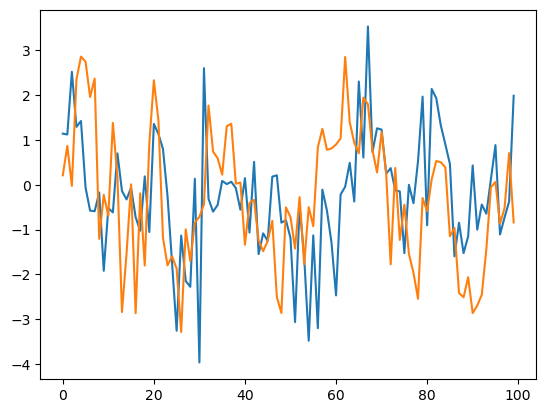

In [11]:
model.freeze_params()
z_samps = model.sample_z(1)
print(z_samps.shape)
stop = 100
for i in range(len(z_samps)):
    plt.plot(z_samps[i,0,0, :stop].detach().cpu().numpy())
    plt.plot(z_samps[i,0,1, :stop].detach().cpu().numpy())
    plt.show()

In [4]:
# Load saved neural network
state_dict = torch.load('my_sequential_model.pth')

In [9]:

model.freeze_params()
print(model.x_dim)

# # Substituting the true parameters
# neural_net = torch.nn.Sequential(
#                 torch.nn.Linear(model.N, 100),
#                 torch.nn.ReLU(),
#                 torch.nn.Linear(100, 100),
#                 torch.nn.ReLU(),
#                 # torch.nn.Linear(100, 100),
#                 # torch.nn.ReLU(),
#                 # torch.nn.Linear(100, 100),
#                 # torch.nn.ReLU(),
#                 torch.nn.Linear(100, model.x_dim)
#             )
# neural_net.load_state_dict(state_dict)
# rec_model = RecognitionModel(model, neural_net=neural_net)

rec_model = RecognitionModel(model, rnn=False)
train_params = {'batch_size': None, 'step_size': 10, 'lrate': 1e-3, 'max_steps': 101, 'n_mc_x': 50, 'n_mc_z': 50, 'batch_mc_z': 25}
rec_model.train_recognition_model(rec_model.training_params(**train_params))
rec_model.plot_LL()

5
step 0 LL -4.76737375
step 1 LL -4.40614890625
step 2 LL -4.14268203125
step 3 LL -3.88359578125
step 4 LL -3.64377375
step 5 LL -3.4417259375
step 6 LL -3.25107640625
step 7 LL -3.09282796875
step 8 LL -2.93696046875
step 9 LL -2.80943515625
step 10 LL -2.67337078125
step 11 LL -2.581124296875
step 12 LL -2.502421171875
step 13 LL -2.426650390625
step 14 LL -2.369547734375
step 15 LL -2.332873671875
step 16 LL -2.3063221875
step 17 LL -2.298590234375
step 18 LL -2.296719453125
step 19 LL -2.301323203125
step 20 LL -2.309734375


KeyboardInterrupt: 

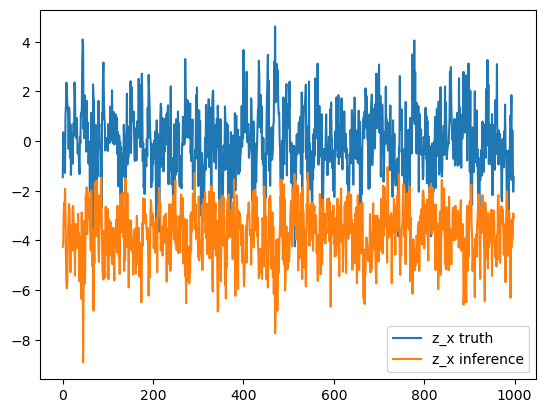

-5.407029263188437
-8.970332878658034
(1, 5, 1000)


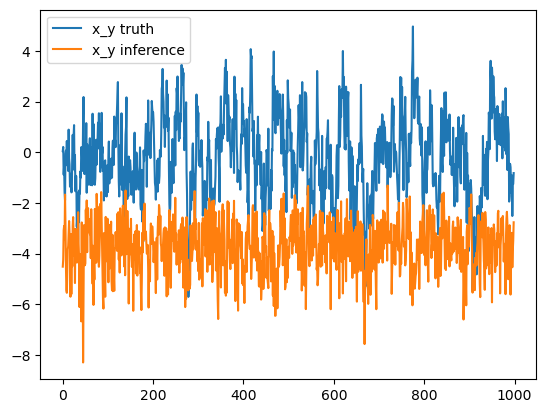

-8.970501160080126 x_x
-5.407831695596691 x_y
(1, 5, 1000)


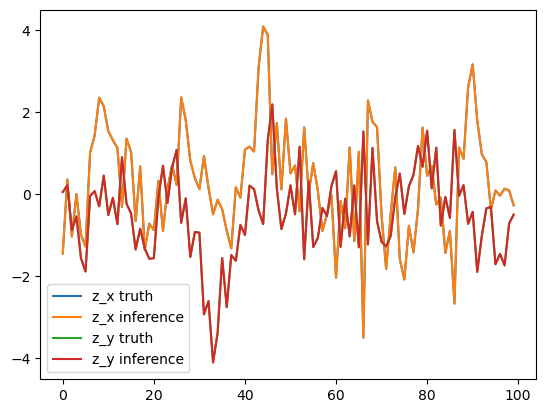

0.9999999943213234
0.9999999922535815


In [10]:
z = rec_model.test_z(rec_model.gen_model.Y)
z = z.detach().cpu().numpy()

stop = -1
plt.plot(v[0,0,:stop], label = 'z_x truth')
# plt.plot(v[0,1,:100], label = 'z_y truth')
plt.plot(z[0,0,:stop], label = 'z_x inference')
# plt.plot(z[0,1,:100], label = 'z_y inference')
plt.legend()
plt.show()

# for i in range(5):
#     plt.plot(z[0,i,:stop], label = 'z_x inference')
# plt.show()
# for i in range(5):
#     plt.plot(v[0,i,:stop], label = 'z_x truth')   
#     # plt.legend()
# plt.show()

# print R^2 for x and y decoding using sklearn
print(r2_score(v[0,1,:], z[0,1,:]))
print(r2_score(v[0,0,:], z[0,0,:]))


x_tilde = rec_model.get_x_tilde(rec_model.gen_model.Y).detach().cpu().numpy()
print(x_tilde.shape)
stop = -1
# plt.plot(x_noise_free[0,0,:stop], label = 'x_x truth')
# plt.plot(x_tilde[0,0,:stop], label = 'x_x inference')
plt.plot(x_noise_free[0,1,:stop], label = 'x_y truth')
plt.plot(x_tilde[0,1,:stop], label = 'x_y inference')
plt.legend()
plt.show()
# print R^2 for x_tilde
print(r2_score(x_noise_free[0,0,:], x_tilde[0,0,:]), 'x_x')
print(r2_score(x_noise_free[0,1,:], x_tilde[0,1,:]), 'x_y')
# print(r2_score(x_noise_free, x_tilde), 'x_all')

_, _, Ks, Cs = rec_model.kalman_covariance() # TODO: should I use prev_mu and prev_Sigma?
_ , mus_smooth, _ = rec_model.kalman_means(Tensor(x_noise_free[None, ...]).to(device), Ks, Cs) # (T_test, 1, ntrials, b)
# _ , mus_smooth, _ = rec_model.kalman_means(Tensor(x[None, ...]).to(device), Ks, Cs) # (T_test, 1, ntrials, b)
mus_smooth = mus_smooth.detach().cpu().numpy().squeeze(1).transpose(1, 2, 0)
print(mus_smooth.shape)
stop = 100
plt.plot(v[0,0,:stop], label = 'z_x truth')
plt.plot(mus_smooth[0, 0,:stop], label = 'z_x inference')
plt.plot(v[0,1,:stop], label = 'z_y truth')
plt.plot(mus_smooth[0, 1,:stop], label = 'z_y inference')
plt.legend()
plt.show()

# print R^2 for x and y smoothing using sklearn
print(r2_score(v[0,1,:], mus_smooth[0, 1,:]))
print(r2_score(v[0,0,:], mus_smooth[0, 0,:]))


In [ ]:
# Checking what sampled posteriors look like
matheron_pert = rec_model.sample_matheron_pert(100)
print(matheron_pert.shape)
x_hat = Tensor(x[None, ...]).to(device) - matheron_pert[..., :x_tilde.shape[-1]]
print(x_hat.shape)
_, _, Ks, Cs = rec_model.kalman_covariance() # TODO: should I use prev_mu and prev_Sigma?
_ , _mus_smooth, _ = rec_model.kalman_means(x_hat, Ks, Cs) # (batch_size, n_mc_z, ntrials, b)
_mus_smooth = _mus_smooth.permute(1,2,3,0).squeeze().detach().cpu().numpy()
print(_mus_smooth.shape)


# # Find the prior mean
# z_samps = model.sample_z(10000)
# z_samps = z_samps.squeeze().detach().cpu().numpy()
# print(z_samps.shape)

torch.Size([100, 1, 2, 5000])
torch.Size([100, 1, 2, 5000])
(100, 2, 5000)


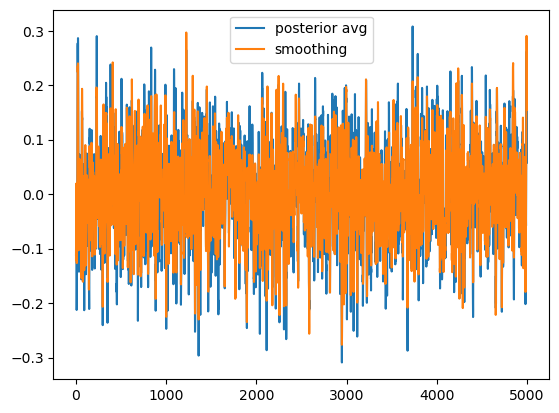

0.7522298766551174
0.86521357134445


In [ ]:
# stop = 100
# for i in range(len(_mus_smooth)):
#     plt.plot(_mus_smooth[i,0,:stop])
#     # plt.plot(_mus_smooth[i,0,1,:stop])
#     # plt.show()
# plt.show()

stop = -1
posterior_avg = _mus_smooth.mean(0)
prior_avg = z_samps.mean(0)
plt.plot(posterior_avg[0,:stop], label = 'posterior avg')
plt.plot(mus_smooth[0,:stop], label = 'smoothing')
# plt.plot(prior_avg[0,:stop], label = 'prior avg')
# plt.plot(z_samps[0,0,:stop], label = 'prior sample')
plt.legend()
plt.show()
# print R^2 between posterior mean and smoothing
print(r2_score(mus_smooth[0,:], posterior_avg[0,:]))
print(r2_score(mus_smooth[1,:], posterior_avg[1,:]))

In [ ]:
# # Natural parameters for p(v_t|v_{t-1})
# mus = self.A @ v[... , :-1] # (ntrials, b, T-1)
# # print(mu.shape, self.Q.shape)
# second_big = torch.zeros(ntrials).to(device)
# for t in range(T-1): # TODO, can we vectorize this?
#     dist = MultivariateNormal(mus[..., t], self.Q)
#     second_big += dist.log_prob(v[..., t+1])

# # # Replace the for loop with this code
# # dist = MultivariateNormal(mus, self.Q[..., None])
# # second_big = dist.log_prob(v[..., 1:]).sum(dim=-1)

mus = torch.zeros(4, 2, 9)
Q = torch.eye(2)[None, ...]
# Q = Q.expand(4, -1, -1)
v = torch.zeros(4, 2, 10)
print(mus.shape, Q.shape)

T = 10
second_big = torch.zeros(4)
for t in range(T-1): # TODO, can we vectorize this?
    print(mus[..., t].shape, Q.shape)
    dist = MultivariateNormal(mus[..., t], Q)
    second_big += dist.log_prob(v[..., t+1])

print(second_big.shape, second_big)

# Replace the for loop with this code
# dist = MultivariateNormal(mus, Q[..., None].expand(-1, -1, -1, mus.shape[-1]))
# second_big = dist.log_prob(v[..., 1:]).sum(dim=-1)
# print(second_big.shape, second_big)
# mus = mus.transpose(-1,-2)
# print(mus.shape)
mus = mus.transpose(-1,-2)
# Q = Q[:, None, ...].expand(-1, mus.shape[1], -1, -1)
Q = Q[:, None, ...]
print(Q.shape, mus.shape)
dist = MultivariateNormal(mus, Q)
v = v[..., 1:].transpose(-1,-2)
print(v.shape)
second_big = dist.log_prob(v).sum(dim=-1)
print(second_big.shape, second_big)


torch.Size([4, 2, 9]) torch.Size([1, 2, 2])
torch.Size([4, 2]) torch.Size([1, 2, 2])
torch.Size([4, 2]) torch.Size([1, 2, 2])
torch.Size([4, 2]) torch.Size([1, 2, 2])
torch.Size([4, 2]) torch.Size([1, 2, 2])
torch.Size([4, 2]) torch.Size([1, 2, 2])
torch.Size([4, 2]) torch.Size([1, 2, 2])
torch.Size([4, 2]) torch.Size([1, 2, 2])
torch.Size([4, 2]) torch.Size([1, 2, 2])
torch.Size([4, 2]) torch.Size([1, 2, 2])
torch.Size([4]) tensor([-16.5409, -16.5409, -16.5409, -16.5409])
torch.Size([1, 1, 2, 2]) torch.Size([4, 9, 2])
torch.Size([4, 9, 2])
torch.Size([4]) tensor([-16.5409, -16.5409, -16.5409, -16.5409])


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import Tensor
import abc
from torch.distributions import MultivariateNormal, Poisson
from torch import optim
from torch.utils.data import DataLoader, Dataset
from torch.nn import Module
from torch import nn
from torch.optim.lr_scheduler import StepLR
from main import *
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

import pickle
from scipy.interpolate import CubicSpline

In [2]:
# Train 4G10 model
# z = np.load('4G10_z.npy')
# z = z.transpose(1,0, 2)
z = np.load('4G10_z_ayush.npy')
print(z.shape)
z = torch.Tensor(z)

Y_train = np.load('neural_train.npy')
Y_train = Y_train.transpose(1,0,2)
Y_train = torch.Tensor(Y_train)
print(Y_train.shape)

Y_test = np.load('neural_test.npy')
Y_test = Y_test.transpose(1,0,2)
Y_test = torch.Tensor(Y_test)
print(Y_test.shape)



(400, 10, 16)
torch.Size([400, 162, 16])
torch.Size([100, 162, 16])


In [3]:


min_firing_rate = 0.5 # Hz
T_trial = 16 * 50 /1000 # seconds
print(Y_train.mean(dim=(0, 2))/T_trial)
Y_train = Y_train[:, Y_train.mean(dim=(0, 2))/T_trial > min_firing_rate, :]
print(Y_train.shape)

tensor([0.1023, 0.1711, 0.5150, 0.1553, 0.3377, 0.0291, 0.2096, 0.8529, 0.5342,
        0.4148, 0.1994, 0.0303, 0.0791, 1.2572, 0.0910, 0.8965, 0.3662, 0.0525,
        0.0348, 0.2645, 0.1555, 0.7842, 1.3041, 0.3535, 0.4150, 0.2262, 0.3520,
        0.5375, 0.2432, 0.4504, 0.0123, 0.2645, 0.1229, 0.1521, 0.3779, 0.2332,
        0.0055, 0.7191, 0.0266, 0.1424, 0.2758, 0.3250, 0.1600, 0.1961, 0.2400,
        0.5227, 0.1855, 0.1615, 0.1412, 0.4430, 0.3865, 0.3096, 0.4412, 0.2895,
        0.0170, 0.4852, 0.2123, 0.5924, 0.0334, 0.1574, 0.1877, 0.2029, 0.0656,
        0.3236, 0.4859, 0.3006, 0.6943, 0.3084, 0.0090, 0.4633, 0.0941, 0.2191,
        0.2338, 0.4986, 0.1295, 0.9152, 0.3830, 0.1848, 0.0555, 0.3355, 0.0492,
        0.0262, 0.4537, 0.0551, 0.1014, 0.2844, 0.3187, 0.0793, 0.4197, 0.3180,
        0.0650, 0.5121, 0.7711, 0.1262, 0.8074, 0.2336, 0.3979, 0.2195, 0.1879,
        0.3779, 0.1301, 0.2045, 0.0820, 0.2865, 0.6920, 0.2469, 0.0688, 0.3035,
        0.2936, 0.3449, 0.1834, 0.0836, 

In [4]:
A = np.load('A.npy')
A = torch.Tensor(A[None, ...]).to(device)
Q = np.load('Q.npy')
B = np.linalg.cholesky(Q)
B = torch.Tensor(B[None, ...]).to(device)
mu0 = np.load('mu0.npy')
mu0 = torch.Tensor(mu0[None, ...]).to(device)
Sigma0 = np.load('Sigma0.npy')
Sigma0_half = np.linalg.cholesky(Sigma0)
Sigma0_half = torch.Tensor(Sigma0_half[None, ...]).to(device)

np.random.seed(0)
torch.manual_seed(0)

# link_fn = torch.functional.F.softplus
# # link_fn = torch.exp
# lik = Poisson_noise()

link_fn = lambda x: x
lik = Gaussian_noise(0.1)

# link_fn = lambda x: x
# lik = Negative_binomial_noise(Tensor(Y_train))


# model = LDS(z, Y_train, lik, link_fn=link_fn)
model = LDS(z, Y_train, lik, link_fn=link_fn, A=A, B=B, mu0=mu0, Sigma0_half=Sigma0_half, trained_z=True, fixed_d=False)
print(model.N, model.T, model.x_dim, model.b, model.ntrials)
train_params = {'batch_size': None, 'n_mc': 500, 'lrate': 7.5e-2, 'max_steps': 1001, 'step_size': 100}
model.train_supervised_model(model.training_params(**train_params))
model.plot_LL()

27 16 10 10 400


/home/ayush/anaconda3/lib/python3.11/site-packages/torch/optim/adam.py:33: UserWarning: optimizer contains a parameter group with duplicate parameters; in future, this will cause an error; see github.com/pytorch/pytorch/issues/40967 for more information
  super().__init__(params, defaults)


step 0 LL -7.109127246621576
step 1 LL -3.360973706567261
step 2 LL -1.4200414688947554
step 3 LL -0.9410495969127789
step 4 LL -0.6878817841709807
step 5 LL -0.46545969983094965
step 6 LL -0.3223673819432417
step 7 LL -0.2740347357272361
step 8 LL -0.27711795004154843
step 9 LL -0.2758959988055181
step 10 LL -0.24936661991160128
step 11 LL -0.21040703882746858
step 12 LL -0.17617688068792492
step 13 LL -0.15151031222425165
step 14 LL -0.13084145985224163
step 15 LL -0.11000418657180608
step 16 LL -0.08965466699422567
step 17 LL -0.07291350128907029
step 18 LL -0.061643816871884416
step 19 LL -0.055326886665867034
step 20 LL -0.05207871312679176
step 21 LL -0.050309690590079906
step 22 LL -0.048710270028044705
step 23 LL -0.045929895254232606
step 24 LL -0.04180993324236175
step 25 LL -0.037007673126548
step 26 LL -0.03239261321520356
step 27 LL -0.028440987184439784
step 28 LL -0.025076626001797497
step 29 LL -0.022035894845190505
step 30 LL -0.019156212263723073
step 31 LL -0.0166563

KeyboardInterrupt: 

In [5]:
model.freeze_params()

for name, prm in model.named_parameters():
    print(f'Name: {name} - Shape: {prm.shape} - Parameter: {prm}')

# print(Q - (B @ B.transpose(-1,-2)).detach().cpu().numpy())
print((model.C @ model.W).sum(axis=-1))

# print(torch.linalg.det(model.Sigma0))
# # min eigenvalue of Sigma0
# min_abs_eigenvalue = torch.abs(torch.linalg.eigvals(model.Sigma0)).min()
# print(min_abs_eigenvalue)

# # print(model.lik.total_count)

# print(model.Q)

Name: A - Shape: torch.Size([1, 10, 10]) - Parameter: Parameter containing:
tensor([[[ 0.6913, -0.0256,  0.2221,  0.0040, -0.0826,  0.1810, -0.3196,
           0.1486,  0.0076,  0.0034],
         [-0.0798,  0.6710,  0.0188,  0.1977,  0.2383,  0.0478,  0.1546,
          -0.1074, -0.0171, -0.0076],
         [-0.0625, -0.0795,  0.5759, -0.3632, -0.1376,  0.0087, -0.0825,
          -0.2804, -0.2230, -0.2442],
         [-0.1767, -0.1861,  0.1713,  0.6299, -0.0075, -0.3032, -0.0699,
           0.1272,  0.1840, -0.0165],
         [ 0.1895, -0.2065, -0.1416,  0.1101,  0.7058,  0.0242,  0.0279,
           0.0563,  0.2337,  0.3023],
         [-0.1806, -0.2366,  0.1210,  0.1383, -0.0689,  0.5664, -0.0441,
           0.0316, -0.0749, -0.0255],
         [ 0.3200, -0.1526, -0.1148, -0.0411,  0.1968, -0.2946,  0.5438,
           0.0426,  0.2977,  0.4728],
         [ 0.1141, -0.0116,  0.3919, -0.0774, -0.1152, -0.0455, -0.2086,
           0.6251, -0.0791, -0.0848],
         [ 0.0178, -0.0096, -0.0319,

torch.Size([3, 400, 10, 16])


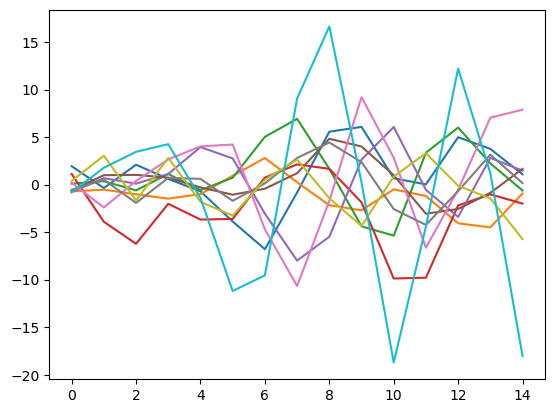

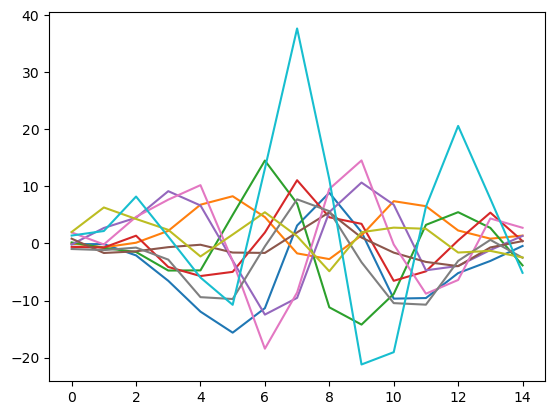

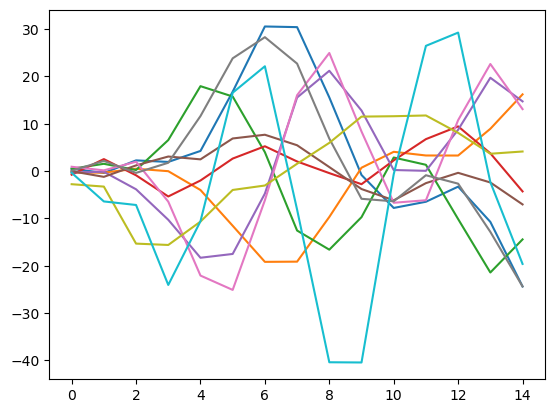

In [28]:
z_samps = model.sample_z(3)
print(z_samps.shape)
stop = -1
for i in range(len(z_samps)):
    for j in range(10):
        plt.plot(z_samps[i,0,j, :stop].detach().cpu().numpy())
    plt.show()

In [7]:
model.freeze_params()
rec_model = RecognitionModel(model, rnn=True)
train_params = {'batch_size': None, 'step_size': 10, 'lrate': 1e-3, 'max_steps': 1001, 'n_mc_x': 25, 'n_mc_z': 50, 'batch_mc_z': 25}
rec_model.train_recognition_model(rec_model.training_params(**train_params))
rec_model.plot_LL()

step 0 LL -1.5344263258078292
step 1 LL -1.5336712785005242
step 2 LL -1.5332896843043946
step 3 LL -1.5329951239326396
step 4 LL -1.5305387254228242
step 5 LL -1.530092204161797
step 6 LL -1.530024061783544
step 7 LL -1.529514173028854
step 8 LL -1.527361771947048
step 9 LL -1.5281917352086951
step 10 LL -1.526584966920385
step 11 LL -1.5265935678616263
step 12 LL -1.5257606946465037
step 13 LL -1.5255659569058526
step 14 LL -1.5248668093697908
step 15 LL -1.5237903952479837
step 16 LL -1.5244589562921498
step 17 LL -1.5237249071191918
step 18 LL -1.5236094216273286
step 19 LL -1.5221462307173068
step 20 LL -1.5230409022636269
step 21 LL -1.5232217951792235
step 22 LL -1.5218402329093705
step 23 LL -1.5215270755349546
step 24 LL -1.5211835580938131
step 25 LL -1.5214239492010964
step 26 LL -1.5218146833128738
step 27 LL -1.5215025662747188
step 28 LL -1.5203569520649978
step 29 LL -1.5200290405603105
step 30 LL -1.5203837733821624
step 31 LL -1.519790274128033
step 32 LL -1.5205181174

KeyboardInterrupt: 

(400, 10, 16)
(2, 10)
(400, 2, 16)


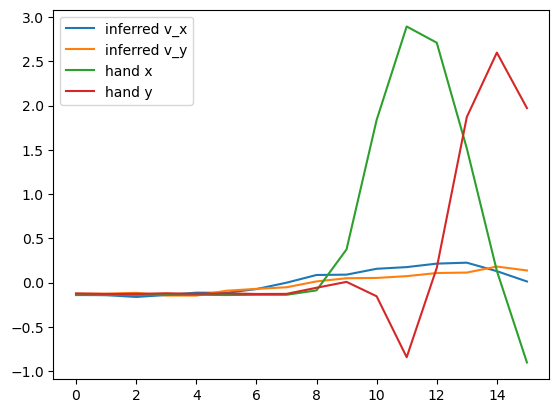

In [8]:
z = rec_model.test_z(rec_model.gen_model.Y)
z = z.detach().cpu().numpy()
print(z.shape)

C = np.load('C.npy')
print(C.shape)
v = (C[None, ...] @ z)
print(v.shape)

hand_train = np.load('hand_train.npy')
hand_train = hand_train.transpose(1,0,2)

trial = 25
plt.plot(v[trial,0,:], label = 'inferred v_x')
plt.plot(v[trial,1,:], label = 'inferred v_y')
plt.plot(hand_train[trial,0,:], label = 'hand x')
plt.plot(hand_train[trial,1,:], label = 'hand y')
plt.legend()
plt.show()



# np.save('inferred_z.npy', v.transpose(1,0,2))